In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Variables are as follows:

- PassengerId
- Survived: 0 for no, 1 for yes
- Pclass: Ticket class. 1,2,3 for 1st, 2nd and 3rd class, respectively
- Name
- Sex
- Age
- SibSp: number of siblings/spouses on board
- Parch: number of parents/children on board
- Ticket: ticker number
- Fare: passenger fare
- Cabin: cabin number
- Embarked: the ort of embarkation. S=Southampton, C = Cherbourg, Q = Queenstown

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
len(df['PassengerId'].unique())

891

All passenger ID's are unique. Since there are no duplicates, this column can be dropped.


In [7]:
df= df.drop(columns=["PassengerId"])

Next, examine the "Name" column. While the entries are unique, some passengers have parantheses attached to their names, maybe as an alternate way to address them due to, perhaps, a higher social standing? Create a new feature of the length of the string and examine later on.

In [8]:
len(df["Name"].unique())

891

In [9]:
df['name_length'] = df['Name'].str.len()
df= df.drop(columns=["Name"])

<AxesSubplot:>

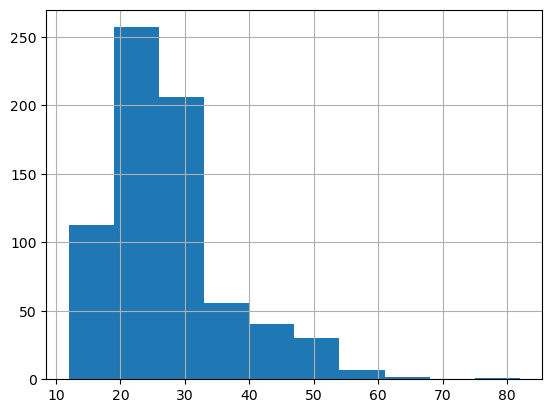

In [58]:
df['name_length'].hist()

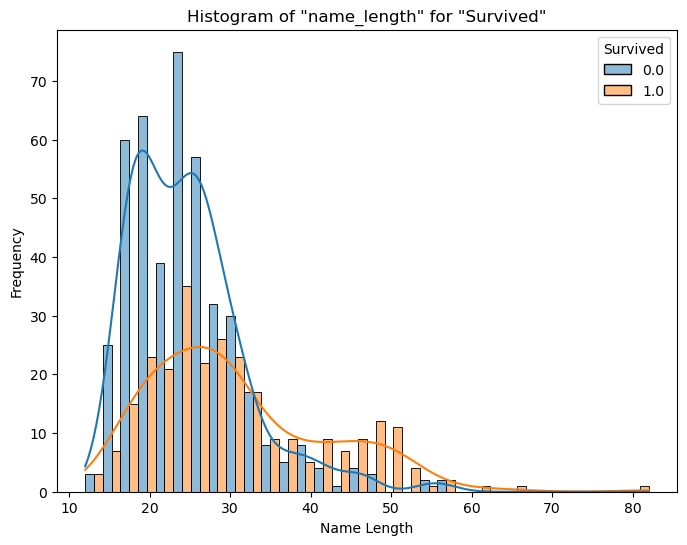

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='name_length', hue='Survived', multiple='dodge', kde=True)
plt.title('Histogram of "name_length" for "Survived"')
plt.xlabel('Name Length')
plt.ylabel('Frequency')
plt.show()


Both distributions are right-skewed. However, there is a noticeable second local peak for those that survived around the name length of around 50. In addition, the two curves intersect around a name length of around 32, where there is a higher chance of death if the name_length<32 and conversely a higher chance of survival if name_length>32. These thus suggest that a large name_length could mean a higher chance for survival.

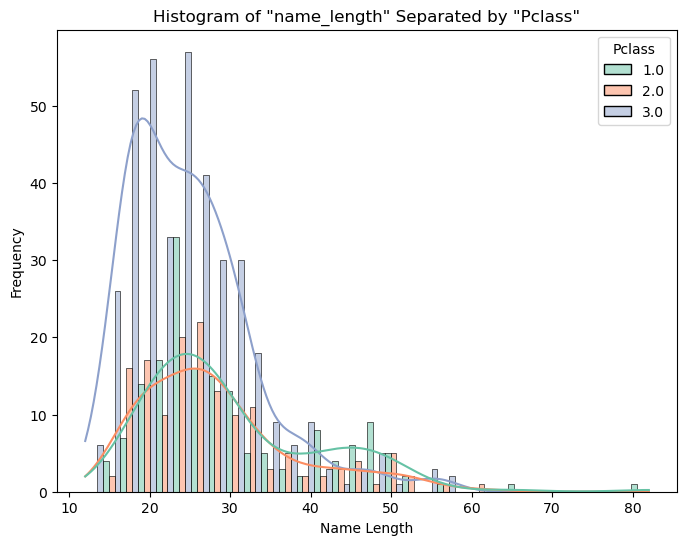

In [63]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='name_length', hue='Pclass', multiple='dodge', kde=True, palette='Set2')
plt.title('Histogram of "name_length" Separated by "Pclass"')
plt.xlabel('Name Length')
plt.ylabel('Frequency')
plt.show()


It is noted that first class passengers do have longer names.

#### Survived

<AxesSubplot:>

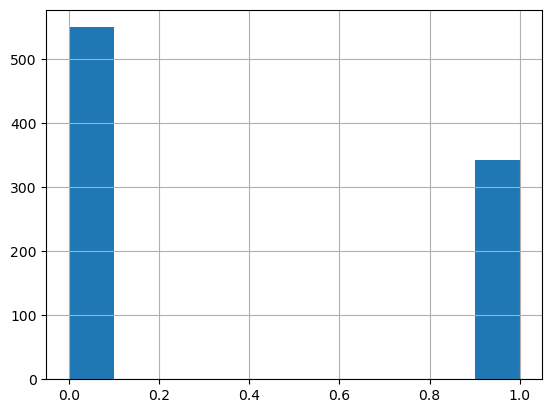

In [12]:
df['Survived'].hist()

Target variable is slightly imbalanced.

#### Sex

<AxesSubplot:>

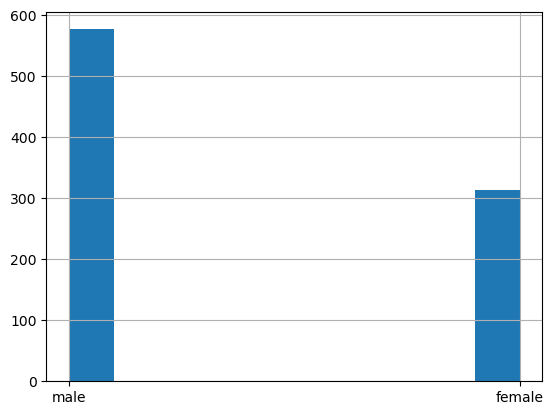

In [13]:
df['Sex'].hist()

There are twice as many males compared to females on board. No missing values for "Sex".

In [14]:
df = pd.concat([df, pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True)], axis=1).drop(columns=['Sex'])


#### Sibsp

<AxesSubplot:>

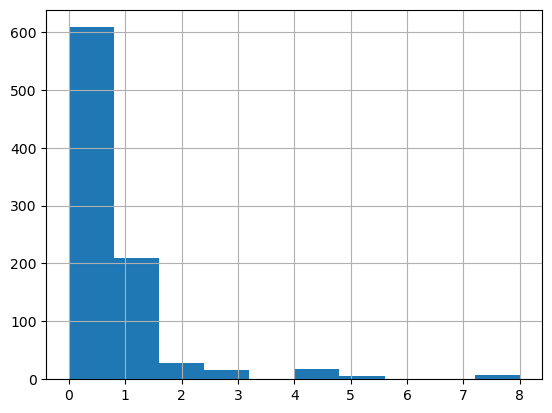

In [15]:
df["SibSp"].hist()

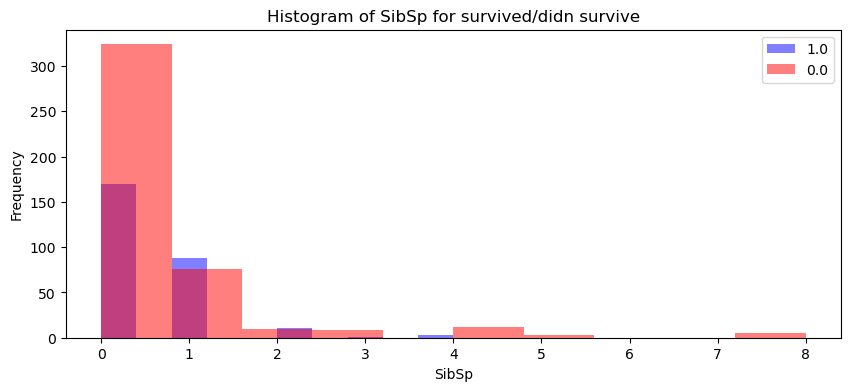

In [60]:
plt.figure(figsize=(10, 4))
for category, color in zip(df['Survived'].unique(), ['blue', 'red']):
    plt.hist(df[df['Survived'] == category]['SibSp'], bins=10, alpha=0.5, label=category, color=color)

plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.title('Histogram of SibSp for survived/didn survive')
plt.legend()
plt.show()

Both histograms for survived/not survived are highly skewed to the right.

#### Parch

<AxesSubplot:>

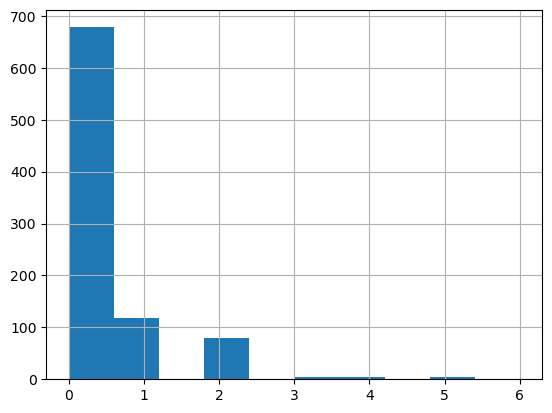

In [17]:
df["Parch"].hist()

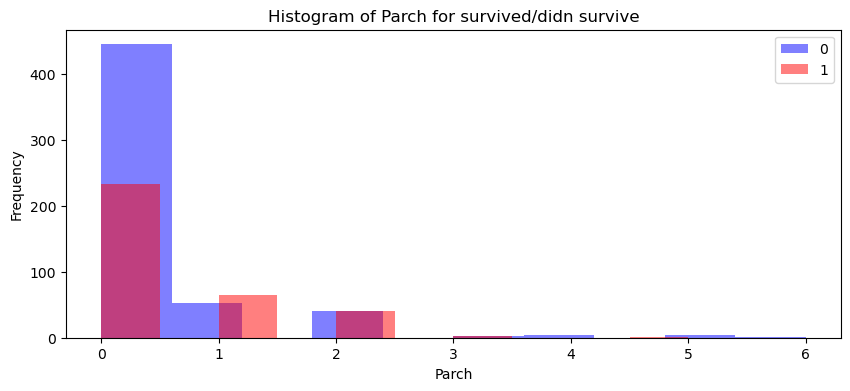

In [18]:
plt.figure(figsize=(10, 4))
for category, color in zip(df['Survived'].unique(), ['blue', 'red']):
    plt.hist(df[df['Survived'] == category]['Parch'], bins=10, alpha=0.5, label=category, color=color)

plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.title('Histogram of Parch for survived/didn survive')
plt.legend()
plt.show()

Both histograms for survived/not survived are highly skewed to the right.

### Fill in missing values

- split the data into train and test set, stratified by the ratio of survived vs didn't survive.
- fill in missing values based on statistics of the train set, and store them
- use those information to fill in the test set

In [19]:
from sklearn.model_selection import train_test_split

df, test_df = train_test_split(df, test_size=0.2, stratify=df["Survived"], random_state=42)


In [20]:
imput_dict = {}

#### Age

There are missing values for "Age" and we have to fill them in. Examine the distribution.

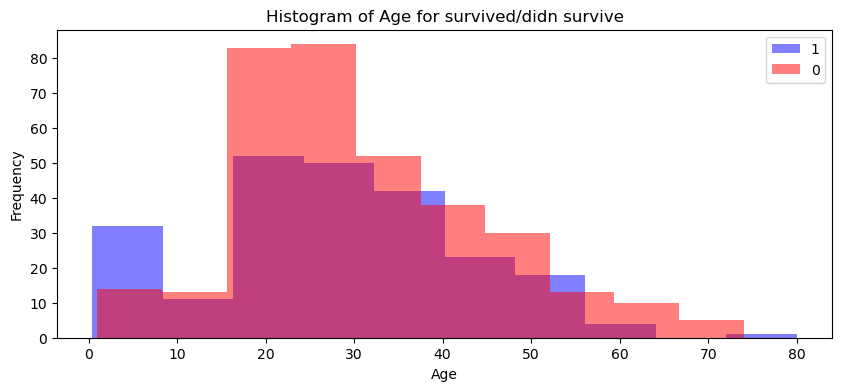

In [21]:
plt.figure(figsize=(10, 4))
for category, color in zip(df['Survived'].unique(), ['blue', 'red']):
    plt.hist(df[df['Survived'] == category]['Age'], bins=10, alpha=0.5, label=category, color=color)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age for survived/didn survive')
plt.legend()
plt.show()

<AxesSubplot:>

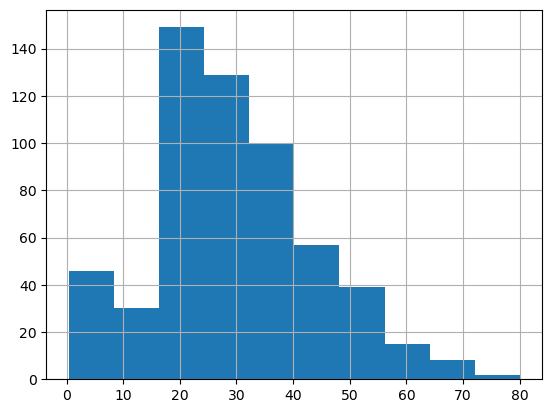

In [22]:
df["Age"].hist()

In [23]:
df["Age"].describe()

count    575.000000
mean      29.807687
std       14.485211
min        0.420000
25%       21.000000
50%       28.500000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

"Age" is a skewed distribution, fill missing values with the median instead.

Very young children of <10 years of age are more likely to survive than not. In contrast, a passenger is more likely to die across all other age groups.

In [24]:
imput_dict["Age"]=df["Age"].median()
df["Age"] = df["Age"].fillna(df["Age"].median())


#### Cabin

In [25]:
df["Cabin"].isnull().sum()/len(df["Cabin"])

0.7752808988764045

In [26]:
df["Cabin"].unique()

array([nan, 'C95', 'A26', 'C78', 'D15', 'E49', 'C52', 'C104', 'A5',
       'F G73', 'E44', 'B96 B98', 'D30', 'C45', 'G6', 'C70',
       'B57 B59 B63 B66', 'B80', 'F E69', 'C106', 'E8', 'D9', 'E68',
       'D17', 'B58 B60', 'C125', 'B18', 'C83', 'B3', 'F33', 'C92', 'E121',
       'B22', 'E33', 'C23 C25 C27', 'E67', 'B35', 'C85', 'F2', 'E12',
       'A14', 'B86', 'A10', 'D45', 'C47', 'D33', 'D6', 'C91', 'C62 C64',
       'C65', 'B101', 'A7', 'A31', 'D49', 'D11', 'D35', 'E101', 'B69',
       'B102', 'C7', 'C2', 'C124', 'C82', 'B4', 'A34', 'D26', 'C110',
       'A19', 'B42', 'A16', 'B78', 'B94', 'B50', 'E34', 'C99', 'C118',
       'D10 D12', 'E46', 'B39', 'B19', 'C68', 'B37', 'A20', 'B30', 'A24',
       'D56', 'E58', 'E25', 'E36', 'F4', 'T', 'D', 'C126', 'C32',
       'C22 C26', 'E17', 'C90', 'D19', 'E24', 'D47', 'E38', 'B82 B84',
       'B49', 'E50', 'B28', 'C93', 'F G63', 'D21', 'E77', 'C46', 'E10',
       'D20', 'A32', 'C123', 'A23', 'E40', 'B20', 'A36', 'D36', 'B77',
       'B73', 'C54

In [27]:
unique_first_characters = df['Cabin'].str[0].unique().tolist()
unique_first_characters

[nan, 'C', 'A', 'D', 'E', 'F', 'B', 'G', 'T']

More than 75% of "Cabin" is null. We can consider these as a seperate category. The rest of the entries appear to be seperated based on a type denoted by an alphabet, with 8 unique entries. We can classify them as such and one-hot encode them.

We will use the same function to process the test set.

In [28]:
df[df['Cabin'] == "C22 C26"]


,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_length,Sex_male
305,1,1,0.92,1,2,113781,151.55,C22 C26,S,30,1
498,0,1,25.00,1,2,113781,151.55,C22 C26,S,47,0


In [29]:
def fill_in_missing_cabin(df):

    df['Cabin'] = df['Cabin'].fillna('M')
    df['Cabin'] = df['Cabin'].str[0]
    df_encoded = pd.get_dummies(df['Cabin'], prefix='cabin_first_char', drop_first=True)
    df = pd.concat([df, df_encoded], axis=1)
    df.drop(columns=['Cabin'], inplace=True)

    return df

In [30]:
df = fill_in_missing_cabin(df)
test_df = fill_in_missing_cabin(test_df)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 692 to 507
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            712 non-null    int64  
 1   Pclass              712 non-null    int64  
 2   Age                 712 non-null    float64
 3   SibSp               712 non-null    int64  
 4   Parch               712 non-null    int64  
 5   Ticket              712 non-null    object 
 6   Fare                712 non-null    float64
 7   Embarked            710 non-null    object 
 8   name_length         712 non-null    int64  
 9   Sex_male            712 non-null    uint8  
 10  cabin_first_char_B  712 non-null    uint8  
 11  cabin_first_char_C  712 non-null    uint8  
 12  cabin_first_char_D  712 non-null    uint8  
 13  cabin_first_char_E  712 non-null    uint8  
 14  cabin_first_char_F  712 non-null    uint8  
 15  cabin_first_char_G  712 non-null    uint8  
 16  cabin_

#### Embarked

<AxesSubplot:>

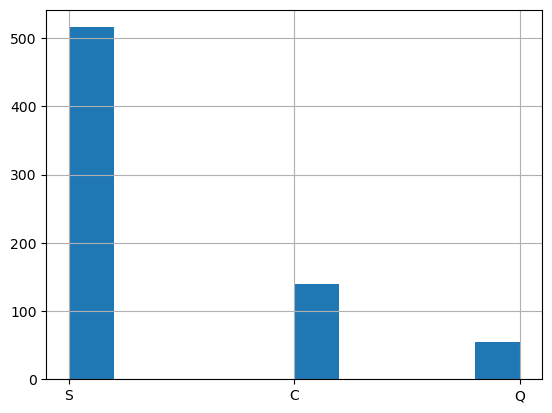

In [32]:
df["Embarked"].hist()

Most passengers embarked from Southampton. Fill in missing values with this value.

In [33]:
mode_value = df['Embarked'].mode().iloc[0]

df['Embarked'] = df['Embarked'].fillna(mode_value)
imput_dict["Embarked"] = mode_value


df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)], axis=1).drop(columns=['Embarked'])


In [34]:
imput_dict

{'Age': 28.5, 'Embarked': 'S'}

In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 692 to 507
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            712 non-null    int64  
 1   Pclass              712 non-null    int64  
 2   Age                 712 non-null    float64
 3   SibSp               712 non-null    int64  
 4   Parch               712 non-null    int64  
 5   Ticket              712 non-null    object 
 6   Fare                712 non-null    float64
 7   name_length         712 non-null    int64  
 8   Sex_male            712 non-null    uint8  
 9   cabin_first_char_B  712 non-null    uint8  
 10  cabin_first_char_C  712 non-null    uint8  
 11  cabin_first_char_D  712 non-null    uint8  
 12  cabin_first_char_E  712 non-null    uint8  
 13  cabin_first_char_F  712 non-null    uint8  
 14  cabin_first_char_G  712 non-null    uint8  
 15  cabin_first_char_M  712 non-null    uint8  
 16  cabin_

#### Ticket

In [36]:
len(df["Ticket"].unique())

571

In [37]:
df["Ticket"].unique()

array(['1601', '239854', 'PC 17483', '392091', 'C.A. 31921', '8475',
       'PC 17757', '367228', '345763', '13213', '4137', 'CA. 2343',
       '113792', 'A/4. 39886', '19928', 'A/5. 13032', '362316', 'C 7075',
       '4133', 'A/5. 3336', '11813', 'PC 17585', 'SW/PP 751', '349233',
       '223596', '349204', '4579', 'PC 17756', 'SOTON/OQ 392089',
       '349218', 'C.A. 24579', '110564', 'S.O.P. 1166', '237565',
       'A/5 3540', '229236', '250648', '248738', '382649', 'C.A. 29178',
       '2671', '234604', '312991', '350046', '113786', 'PC 17754',
       'STON/O 2. 3101293', '348124', '370365', '7553', '13507', '347088',
       '113760', '113773', '113798', 'C 7076', 'A/4 45380', 'P/PP 3381',
       '231919', 'LINE', '239855', '347054', 'Fa 265302',
       'STON/O2. 3101279', '347082', 'W/C 14208', '2672', '3101295',
       '113789', '17421', '36209', '365226', 'CA. 2314', 'A/5 3594',
       'PC 17608', 'PC 17569', 'SC/Paris 2123', '250644', '219533',
       '239865', '335677', '29750

Retain the information before the numbers as ticket types. Other than alphabets, there are "." and "/". Remove these and combine anything that isnt a number into a single string.

In [38]:
tickets = list()

for i in list(df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace('.', '').replace('/', '').strip().split(' ')[0])
    else:
        tickets.append('x')
        
df['Ticket'] = tickets

In [39]:
df.Ticket.unique()

array(['x', 'PC', 'CA', 'A4', 'A5', 'C', 'SWPP', 'SOTONOQ', 'SOP',
       'STONO', 'PPP', 'LINE', 'Fa', 'STONO2', 'WC', 'SCParis', 'SCA4',
       'FCC', 'SCPARIS', 'PP', 'SCAH', 'WEP', 'SOC', 'AS', 'SOTONO2',
       'SOPP', 'SP'], dtype=object)

In [40]:

df = pd.get_dummies(df, columns=['Ticket'], prefix='T', dtype=int)

In [41]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,name_length,Sex_male,cabin_first_char_B,cabin_first_char_C,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
692,1,3,28.5,0,0,56.4958,12,1,0,0,...,0,0,0,0,0,0,0,0,0,1
481,0,2,28.5,0,0,0.0000,32,1,0,0,...,0,0,0,0,0,0,0,0,0,1
527,0,1,28.5,0,0,221.7792,18,1,0,1,...,0,0,0,0,0,0,0,0,0,0
855,1,3,18.0,0,1,9.3500,26,0,0,0,...,0,0,0,0,0,0,0,0,0,1
801,1,2,31.0,1,1,26.2500,43,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1,3,28.5,0,0,7.8792,33,0,0,0,...,0,0,0,0,0,0,0,0,0,1
258,1,1,35.0,0,0,512.3292,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
736,0,3,48.0,1,3,34.3750,39,0,0,0,...,0,0,0,0,0,0,0,1,0,0
462,0,1,47.0,0,0,38.5000,17,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 692 to 507
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            712 non-null    int64  
 1   Pclass              712 non-null    int64  
 2   Age                 712 non-null    float64
 3   SibSp               712 non-null    int64  
 4   Parch               712 non-null    int64  
 5   Fare                712 non-null    float64
 6   name_length         712 non-null    int64  
 7   Sex_male            712 non-null    uint8  
 8   cabin_first_char_B  712 non-null    uint8  
 9   cabin_first_char_C  712 non-null    uint8  
 10  cabin_first_char_D  712 non-null    uint8  
 11  cabin_first_char_E  712 non-null    uint8  
 12  cabin_first_char_F  712 non-null    uint8  
 13  cabin_first_char_G  712 non-null    uint8  
 14  cabin_first_char_M  712 non-null    uint8  
 15  cabin_first_char_T  712 non-null    uint8  
 16  Embark

In [43]:
df = df.apply(pd.to_numeric, errors='coerce')  
df = df.astype(float)  


#### Fare and Pclass

In [44]:
df["Fare"].describe()

count    712.000000
mean      31.819826
std       48.059104
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

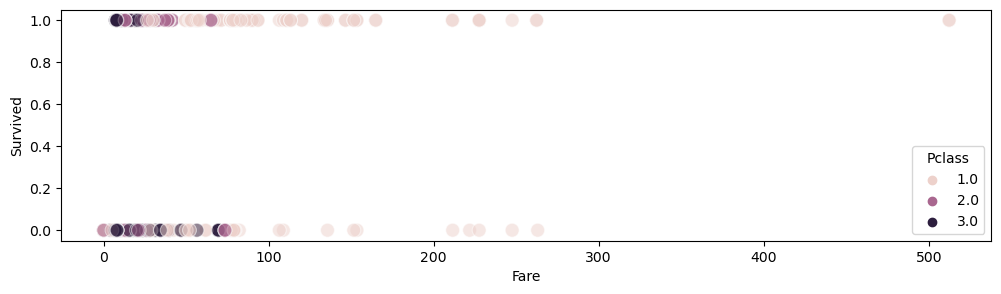

In [45]:
plt.figure(figsize=(12, 3))
sns.scatterplot(x='Fare', y='Survived', hue='Pclass', data=df, alpha=0.5, s=100)
# plt.title('Scatter Plot Split according to Survival')
plt.show()

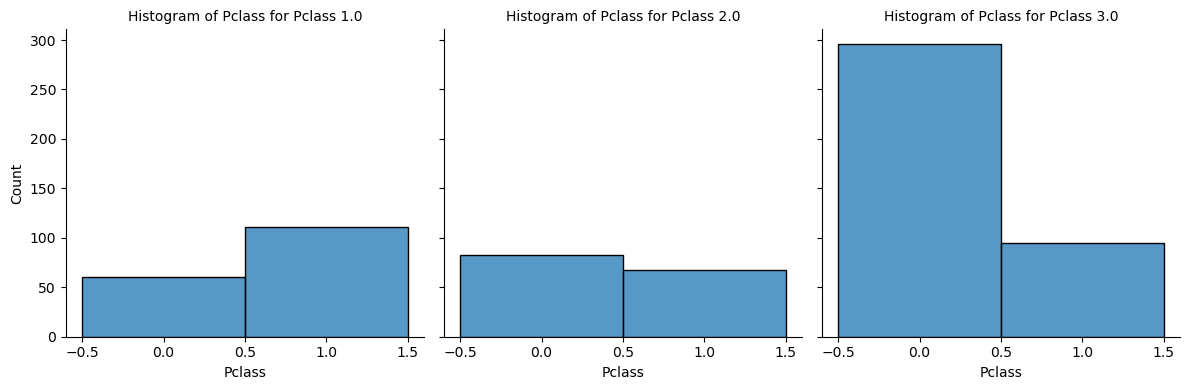

In [46]:
g = sns.FacetGrid(df, col='Pclass', height=4, col_wrap=3)
g.map(sns.histplot, 'Survived',  stat='count', discrete=True, multiple='stack')

# Set labels and titles
g.set_axis_labels('Pclass', 'Count')
g.set_titles('Histogram of Pclass for Pclass {col_name}')

plt.show()

It appears that your chances of survival increase significantly if you have either a more expensive ticket, or at a higher Pclass (Pclass 1).

#### Correlation Matrix

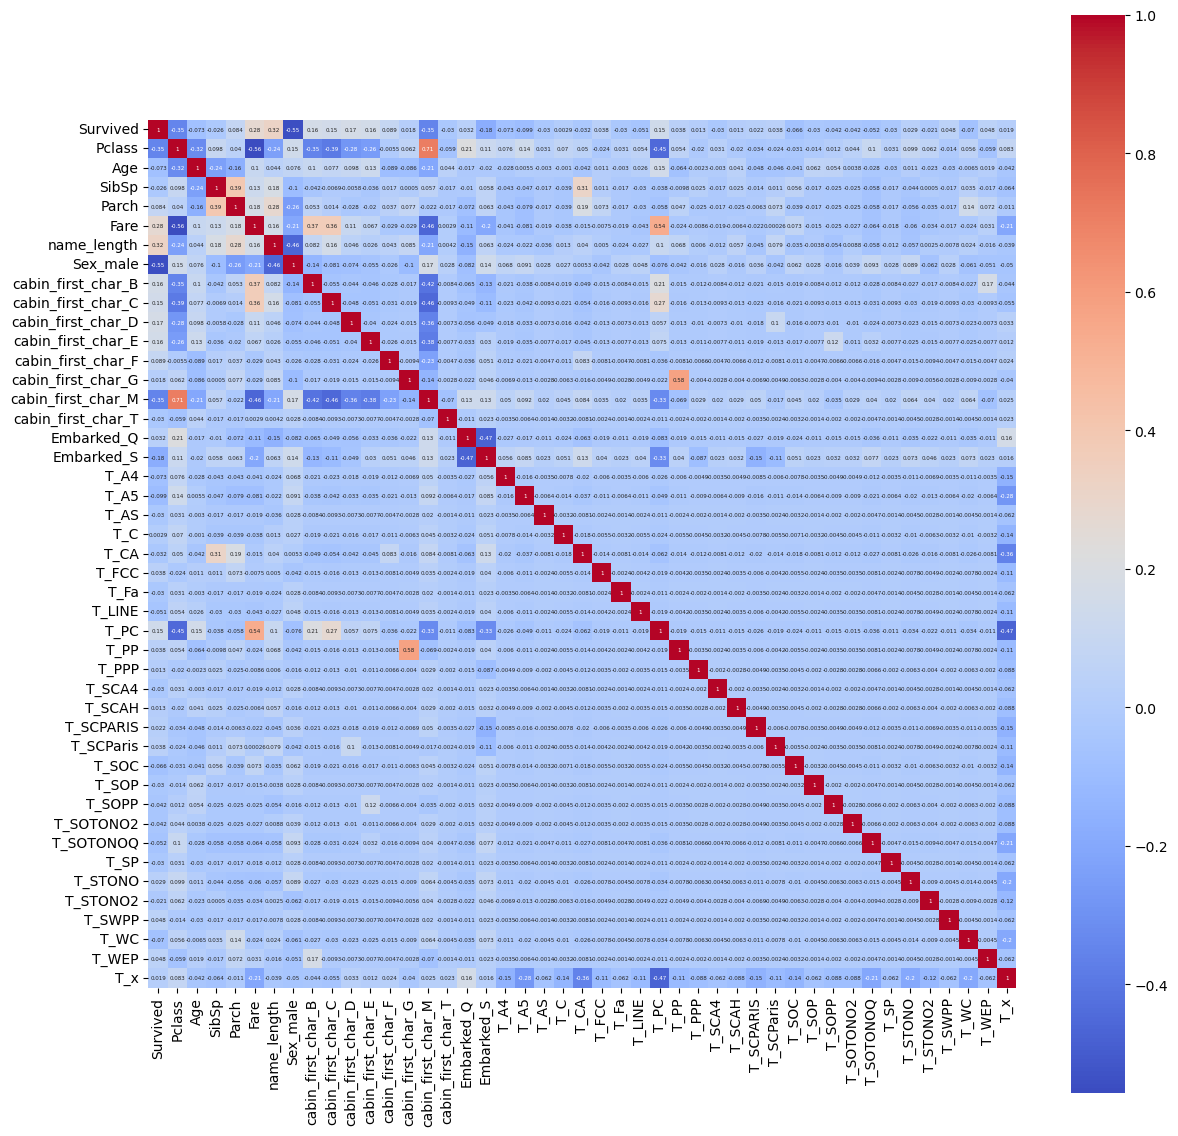

In [47]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(14,14))
sns.heatmap(correlation_matrix,square = True, cmap='coolwarm', annot=True, annot_kws={'size': 4})
plt.show()

Observations from EDA:
- As expected, fare is quite correlated with survival.
- Having a longer name is slightly more correlated with survival than fare. This agrees with the analysis of "name_length" vs survival. Those from Pclass 1 tend to have a longer name.
- Passengers in cabins with first_char in the early parts of the alphabet are more likely to survive.
- Passengers with missing cabin info are a lot less likely to survive. Those with missing cabin info are also more likely to be in Pclass 3, the lowest Pclass, corresponding to the lowest fares.
- Those from Pclass 1 are more likely to survive compared to those from Pclass 2 or 3.
- Males are less likely to survive.
- Those who embarked from Queenstown are have a higher chance of survival.
- Very young children of <10 years of age are more likely to survive than not. In contrast, a passenger is more likely to die across all other age groups.
- Age, Parch and SibSp are right-skewed.